<a href="https://colab.research.google.com/github/shivraj7/scalar/blob/main/Copy_of_Revision_notes_10_Probability_Distributions_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>**Disclaimer: Please note that any topics that are not covered in today’s lecture will be covered in the next lecture**.</font>

## <font color='blue'>**Content**</font>

- Introduction
- Log Normal Distribution.

 - Real life dataset
 - Key Characteristics of a Log-Normal Distribution

- Poisson Distribution

 - Application
 - Rules of Poisson Distribution

 - Poisson approximation to Binomial
  


## <font color='blue'>**Log Normal Distribution**</font>

```
Imagine that you are a data scientist at Amazon/Swiggy/Zomato
You've collected a bunch of data on delivery times.
```
Generally how much time delivery takes?  
- Let's assume around 30 mins, maybe sometimes less than 30 maybe more

Now, if we take thousands of these delivery time data points and plot a histogram,   

- It may be a bit skewed to the right. Sometimes deliveries are quicker than 30 minutes, and sometimes they take a bit longer.

<font color='purple'>**The lognormal distribution is a continuous probability distribution that models this type of right-skewed data.**</font>



<br>

```
Suppose X is the actual data
```

- Now the beauty of log normal is when you take **the logarithm (log) of the actual delivery time data** and plot a new histogram,  

- The new histogram tends to be more symmetrical, like a bell curve.


In simple terms, <font color='purple'>the Log-Normal Distribution takes the original data, does some math (logarithm), and makes it look more like a normal, symmetrical distribution</font>.  

<br>

So, in the language of distributions, we say the "**original delivery time data (X) is log-normal**"

- It means if X follows a log-normal distribution, log(X) follows a normal (bell-shaped) distribution.

<br>

You can **exponentiate a normal distribution (exp (X)) to obtain the lognormal distribution**.   

In this manner, you can transform back and forth between pairs of related log normal and normal distribution




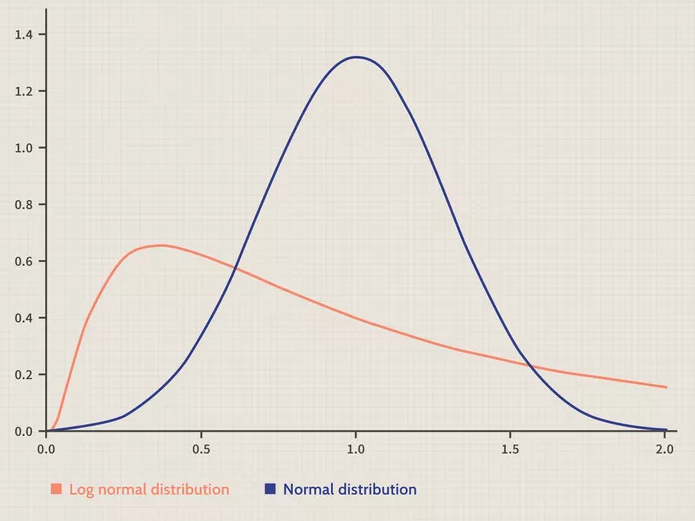

<br>

We can see in this image that the original data follows log normal distribution and if we take log of this distribution, it'll look more symmetrical like a bell shaped curve.  

We will implement this on a real life dataset

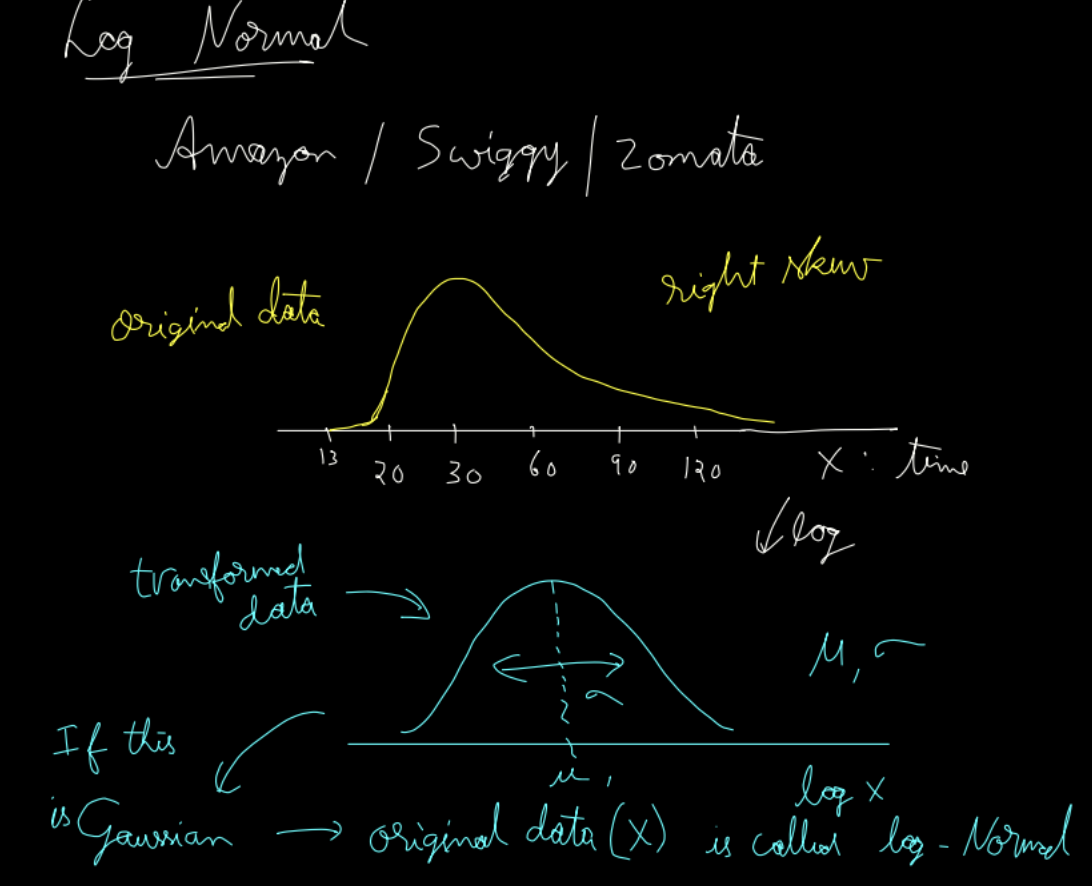

<br>
<br>

### <font color='purple'>**Real Life dataset**</font>  

Let's have a look into the dataset which has waiting time records

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1SIZC1FZvZAhVzRvnZ7IFWBUDavvzIafJ -O waiting_time.csv

--2024-01-18 10:35:32--  https://drive.google.com/uc?id=1SIZC1FZvZAhVzRvnZ7IFWBUDavvzIafJ
Resolving drive.google.com (drive.google.com)... 74.125.31.113, 74.125.31.102, 74.125.31.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SIZC1FZvZAhVzRvnZ7IFWBUDavvzIafJ [following]
--2024-01-18 10:35:32--  https://drive.usercontent.google.com/download?id=1SIZC1FZvZAhVzRvnZ7IFWBUDavvzIafJ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1656272 (1.6M) [application/octet-stream]
Saving to: ‘waiting_time.csv’

waiting_time.csv    100%[===================>]   1.58M  --.-KB/s    in 0.01s   

2024-01-18 10:35:32 (140 MB/s) 

> <font color='purple'>Importing Libraries</font>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import poisson, binom

In [ ]:
data = pd.read_csv("/content/waiting_time.csv")
data.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


Let's plot this data

<Axes: ylabel='Count'>

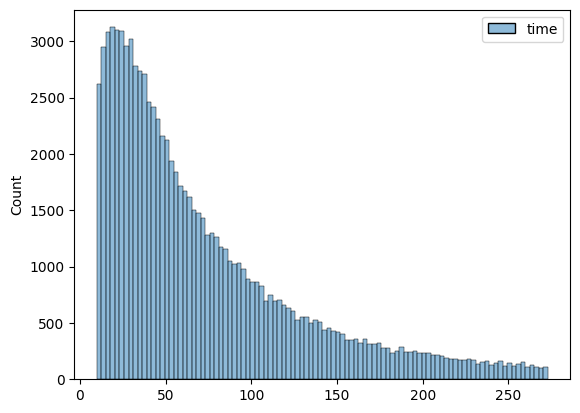

In [ ]:
sns.histplot(data,bins=100)

<br>
<br>

<font color='purple'>**Observation**</font>  

We can observe that it is right skewed.  

Now,

> <font color='purple'>**Q1. How can we answer questions related to the data which is distributed in this way?**</font>    

We can transform this data using a **log** and let's see the distribution of transformed data.  





### <font color='purple'>**Log Normal Distribution Parameters**</font>

As we know, the random variable for the original data is $X$ and after transforming it using log, the random variable of transformed data is $ln(x)$.


If you have the **mean ($μ$) and standard deviation ($σ$) of the natural logarithm** of a random variable $X$ and you want to **find the mean and standard deviation of the original random variable $X$** (which follows a log-normal distribution), you can use the following relationships:



- **Mean of original $X$** = ${\displaystyle \exp \left(\mu +{\frac {\sigma ^{2}}{2}}\right)}$  



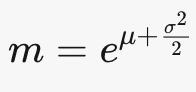

- **Variance of original $X$** = ${\displaystyle [\exp(\sigma ^{2})-1]\exp(2\mu +\sigma ^{2})}$.




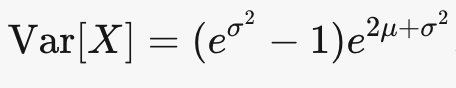

<font color='purple'>Let's transform our original data:</font>   

In [ ]:
data_log = np.log(data)

data_log

,time
0,5.214952
1,3.603363
2,3.400211
3,4.325989
4,4.118865
...,...
90041,4.911816
90042,2.722871
90043,5.336766
90044,4.945125


<Axes: ylabel='Count'>

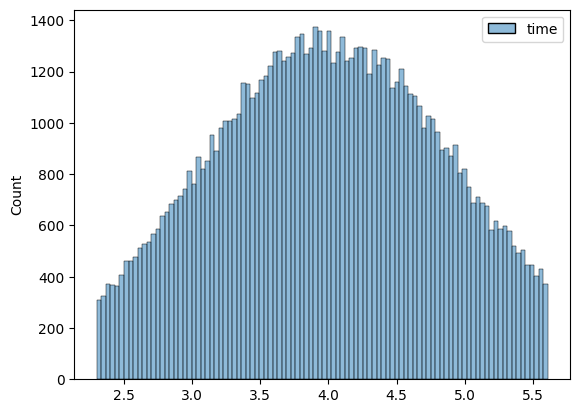

In [ ]:
sns.histplot(data_log, bins=100)

<br>
<br>

<font color='purple'>**Observation**</font>  

- We can observe that after applying logarithm to the right skewed data, we get the distribution which is approximately normal.

- We converted our data in such a format such that we are able to utilize the properties of gaussian distribution  


This is known as <font color='purple'>**log normal transformation**</font>  


<br>  

> <font color='purple'>Q1. Why did we specifically choose log?</font>  


1. <font color='purple'>**Symmetry:**</font>  

  - Our original data is right-skewed, with a long tail on the right side indicating occasional very long delivery times.  

  - The **logarithmic transformation** compresses larger values more than smaller values.   
  
    - The extreme right tail is pulled in, making the distribution more symmetric.  

2. <font color='purple'>**Stabilizing Variance:**</font>  

  - In the original delivery time data, you might observe that the variance (spread) of delivery times increases as the mean delivery time increases.  

  - Taking the logarithm can **stabilize the variance**.  
   
    We can observe that the spread of delivery times after the transformation is more consistent across different independent variables.  


In summary,   

Applying a logarithmic transformation to the right skewed data can make the distribution more symmetric and stabilize the variance, making it potentially more useful for certain statistical analyses.  





Let's understand this with the help of an example:

Suppose we have values like,  

```  
X: 1, 10, 100, 1000, 10000
```

Now let's take a log of all these values, we will get:  

```  
- ln(1) =   0
- ln(10) =  2.30
- ln(100) =  4.60
- ln(1000) =  6.90
- ln(10000) = 9.21

```

**Observation**:  

- We can clearly observer that after taking log of all the values it compresses larger values more than smaller values.

  - 10,000 got transformed into 9.21 and we can clearly see how much compressed the values got.
  - This can bring symmetry to the distribution.

- We can also observe that after applying the log, variance also got stabilized.


<br>

**Example on stabilizing variance:**

We can also observe that after applying the log, variance also got stabilized.

- Let's consider a simple example to illustrate this:

    Suppose you have a set of positive numbers with increasing variance:
Original Data: $1,2,4,8,16,32,…$

- If you observe the differences between consecutive values, you'll see that the differences increase:

    Differences: $1,2,4,8,16,…$.


Now, if you take the logarithm of the original data:  


- Log-Transformed Data: $ln⁡(1),ln⁡(2),ln⁡(4),ln⁡(8),ln⁡(16),…$.

  The differences between the log-transformed values are now constant around $0.693$
    
  **Differences:**         
   
  $ln⁡(2)−ln⁡(1),ln⁡(4)−ln⁡(2),ln⁡(8)−ln⁡(4),ln⁡(16)−ln⁡(8),…$
    
This constant difference suggests a stabilized variance, which can be beneficial in statistical analyses.


## <font color='blue'>**Key Characteristics of a Log-Normal Distribution**</font>
Let's understand the key characteristics of a log-normal distribution.  

1. **Positivity:**  

  - All values in a log-normal distribution are <font color='purple'>positive because the logarithm of any positive number is always real</font>.    

  - Eg. Let's say the original value $X$ is -1.5 then the log normal distribution value will be $e^X$ which is $e^{1.5} = 0.223$, this comes out to be positive.


2. **Skewedness:**   

  - If the original data is right-skewed, the log-normal transformation can make it more symmetric and bell-shaped.

3. **Multiplicative Processes:**   

  - Log-normal distributions are suitable for modelling scenarios where the final outcome is influenced by the product of independent factors.  

  - In our dataset, we are aware that <font color='purple'>delivery times may get affected by various independent factors like traffic, order processing time</font>, etc.

In summary, a log-normal distribution is a good fit for positively skewed, ensuring **positivity, and aligning with multiplicative processes** often seen in real-world scenarios.

Now, let's see what is poisson distribution  

## <font color='blue'>**Poisson Distribution**</font>

> <font color='purple'>**Scenario: Traffic at a Toll Booth**</font>   

```
Imagine you're at a toll booth on a highway,
observing the number of vehicles passing through the toll booth in a given time period.
```

The Poisson distribution comes into play when we want to <font color='purple'>**model the number of events that occur in a fixed interval of time or space**</font>.  

  - In this case, <font color='purple'>vehicles passing through the toll booth are our event</font>.  

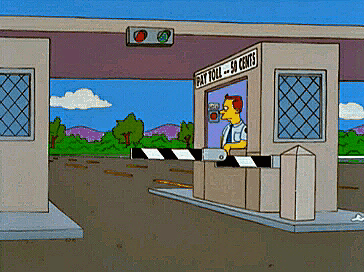


<br>
<br>

<font color='purple'>**Explanation:**</font>

The Poisson distribution is a **discrete probability distribution** particularly useful when dealing with events that occur randomly and independently, but with a known average rate.  

In our toll booth scenario, we can make a few key observations:  

1. <font color='purple'>**Fixed Interval:**</font>   

  - Let's say we want to study the number of vehicles passing through the toll booth in a specific time period, <font color='purple'>say 1 hour</font>.  

2. <font color='purple'>**Average Rate:**</font>   

  - We have an average rate of vehicles passing through the toll booth, <font color='purple'>let's say 30 vehicles per hour</font>.

  - It is denoted as $λ$ (lambda), which represents the average rate of occurrence of the event within a given interval.    

  - Here, <font color='purple'>λ is 30 vehicles per hour</font>.

<br>

Now, the poisson distribution **helps us answer some questions** like:  

> <font color='purple'>**Q1. What is the probability of exactly 25 vehicles passing through the toll booth in the next hour?**</font>  

> <font color='purple'>**Q2. What is the probability of more than 40 vehicles passing through the toll booth in the next hour?**</font>  


This toll booth scenario is just one example of how the Poisson distribution is applied in various fields.   


The graph below shows examples of Poisson distributions with different values of λ.





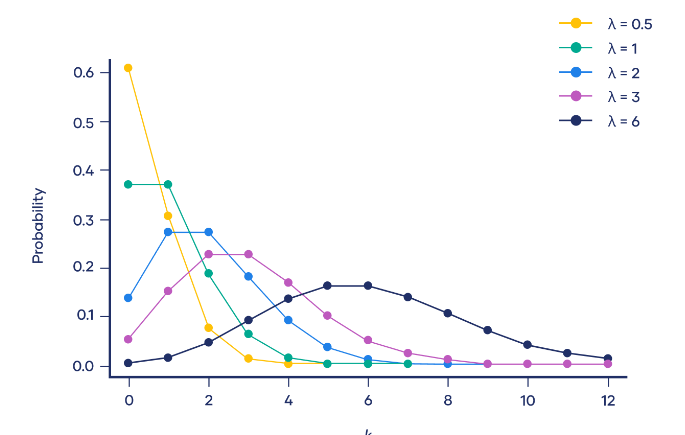

<br>
<br>

- When **λ is low, the distribution is much longer on the right side of its peak than on its left**.  

- As **λ increases, the spread of distribution also increases**  

  - If you <font color='purple'>keep increasing, the distribution looks more and more similar to a normal distribution</font>.  



### <font color='blue'>**Poisson Distribution Formula**</font>  

If a random variable $X$ follows a Poisson distribution, then the probability that $X = k$ successes can be found by the following formula:  

- **$P[X=k] = \Large \frac{λ^k \ * \  e^{-λ}}{k!}$**   

  where:

  - **λ**: rate or mean number of successes that occur during a specific interval  

  - **k**: number of successes  

  - **e**: a constant equal to approximately 2.71828  

This is also known as **Probability Mass Function (PMF)** of poisson distribution as using this formula we can calculate the probability of exact events.   




## <font color='blue'>**Example 1:**</font>  

```
suppose a particular hospital experiences an average of 2 births per hour.   
We can use the formula above to determine
Calculate the probability of experiencing 0, 1, 2, 3 births, etc. in a given hour:  
```

Here,
rate ($λ$) = 2  
e = constant= 2.71828


$P[X=0] = \Large \frac{2^0 \ * \  e^{-2}}{0!} = 0.1353$  


$P[X=1] = \Large \frac{2^1 \ * \  e^{-2}}{1!} = 0.2707$  

$P[X=2] = \Large \frac{2^2 \ * \  e^{-2}}{2!} = 0.2707$

$P[X=3] = \Large \frac{2^3 \ * \  e^{-2}}{3!} = 0.1804$


<br>  

Here, we can also find the probability using the function in python i.e. **poisson.pmf()** as it is asking for the probability of an exact value  

- We have to pass 2 parameters in this function, **k:** number of events and **mu:** average or rate


In [ ]:
# P[x=0]

poisson.pmf(k=0, mu=2)

0.1353352832366127

In [ ]:
# P[x=1]

poisson.pmf(k=1, mu=2)

0.2706705664732254

In [ ]:
# P[x=2]

poisson.pmf(k=2, mu=2)

0.2706705664732254

In [ ]:
# P[x=3]

poisson.pmf(k=3, mu=2)

0.18044704431548356

Let's look into more examples.

### <font color='purple'>**Applications:**</font>

**1) Football Match Goals**

Imagine we have collected data for all the football matches ever happened, now we want to analyze the distribution of goals.  

- We observe that the average goal per 90 mins match is 2.5  

  - So the rate will be 2.5 goals per match (λ = 2.5).  

> <font color='purple'>Q. If I want to know the probability of getting 1 goal in last 30 mins?</font>  

This is where poisson distribution comes into play.  

Here, the rate is 2.5 goal/ 90 mins  (per match) which mean average number of goals in 90 mins

- What will be the average number of goals in 45 mins?    
      2.5 goals -> 90 mins   

  Average goals for half of the time will be half of the total average rate   

      Rate: 2.5/2 = 1.25/45 mins (per 45 mins)   

  Similarly, we can define a range for 30 mins,  

      1.25 goals -> 45 mins
       x goals? -> 30 mins    

       x = (30 * 1.25)/45

       Rate = 0.833 goals/30 mins

So,

> **Q1. How long should you stay to witness a goal on average?**  

- On average, <font color='purple'>**staying at least 45 minutes increases the probability of witnessing a goal**</font> during a football match.  

- Because staying at least 45 minutes aligns with the average goal rate of 1.25 goals per 45 minutes.
  
- This duration maximizes the likelihood of experiencing a goal during a football match based on the observed rate of scoring.


Next example,

<br>



**2) Support Phone Calls**

Think about a support centre that receives 100 calls per hour.  

- So the average call received per minute will be,  

      100 calls -> 60 mins (1 hr)
      x calls -> 1 min  

      Rate: 100/60 = 1.666 calls/min


This allows us to analyze the probability of receiving a certain number of calls within a specific time frame.

- The call center management can use this rate to determine the optimal number of customer service representatives to have on duty during different time periods.

- For instance, during peak times, when the call rate is high, more staff may be required to handle the increased volume.

One more example

<br>


**3) Hospital OPD Patients**

Consider a hospital's Outpatient Department (OPD) where, on average, 200 patients visit in a day (λ = 200).

- The average hourly rate of patient arrivals can be calculated by dividing the daily rate by the number of working hours.

- For example, if the facility operates for 8 hours, the hourly rate would be $\frac {200}{8} = 25$ patients per hour.

- The facility can use this information for resource planning, such as determining the optimal number of staff, doctors, and examination rooms needed to handle the expected patient load efficiently.


<br>

These are some real life examples where poisson distribution can help us understand the liklihood of an event occurring in a specific time interval or space

## <font color='blue'>**Rules of Poisson Distribution**</font>
**Key rules that govern the Poisson distribution:**

1. <font color='purple'>**Counting:**</font>
   - The Poisson distribution is tailored for **counting the number of discrete events happening within a fixed interval**

   - The events can take on values like 0, 1, 2, 3, and so on.

2. <font color='purple'>**Independence:**</font>

   - The occurrence of one event should not affect the occurrence of another event.

   - Events are considered to be independent if the probability of one event happening doesn't change based on whether another event has occurred.  

> **For example**,

- <font color='purple'>**if an accident occurs in Delhi at 4 PM, it will have no impact on the occurrence of an accident in Mumbai at the same time**</font>.   
   
- Each event is independent of the other, and the outcome in one location does not influence or affect the outcome in the other location.

<br>

3. <font color='purple'>**Rate (λ or μ):**</font>

   - The distribution is defined by a single parameter often denoted as λ (lambda) or μ (mu), which represents the average rate of occurrence of the event within the given interval.

   - This rate remains constant throughout the interval and doesn't change based on the occurrences.

4. <font color='purple'>**No Simultaneous Events:**</font>
   - The Poisson distribution assumes that there cannot be more than one occurrence of the event at exactly the same time or within an infinitesimally small interval of time or space.  
   
   - For instance, <font color='purple'>if a family of five people enters a store, it's counted as a single event, not five separate events.</font>

   - Another example, two goals can't be scored at a same time


Let's look at the some examples using Poisson distribution

## <font color='purple'>**Example 2:**</font>
```
A city sees 3 accidents per day on average.
Find the probability that there will be 5 accidents tomorrow.
```

Solution:

Given,  

The rate is given as 3 accidents per day on average,  

- $λ = 3$  

Let “$X$” denote the number of accidents tomorrow.

- We say “$X$” is Poisson distributed with rate ($λ$) = 3  

<br>

So, the probability that there will be 5 accidents tomorrow is $P[X=5]$  

By using the formula,  

- $P[X=5] = \Large \frac{λ^5 \ * \  e^{-λ}}{5!} = \frac{3^5 \ * \  e^{-3}}{5!}$.  

Using python,


In [ ]:
# P[X=5]
poisson.pmf(k=5, mu=3)

0.10081881344492458

There is a 10% chance that there will be 5 accidents tomorrow.  

<br>

**Next question**

> <font color='purple'>**Q1. Find the probability that there will be 5 or fewer accidents tomorrow**?</font>  

Here we want to calculate $P[X≤5]$,  

We will use **poisson.cdf()** here as we want to calculate cumulative probability.  

- $P[X≤5] = P[X=0] + P[X=1] + P[X=2]+ P [X=3]+ P[X=4] + P[X=5]$  

We can directly find it using poisson.cdf()


In [ ]:
# P[X ≤ 5]
poisson.cdf(k=5, mu=3)

0.9160820579686966

## <font color='purple'>**Example 3:**</font>

```
Let “X” be the number of typos in a page in a printed book, with mean of 3 typos per page.
What is the probability that a randomly selected page has atmost 1 typo?
```

Here, rate ($λ$) = 3  

we want to find for atmost 1 type, so we need to find  

$P[X≤1]$ which will be  $P[X=0] + P[X=1]$.  

We can directly use **poisson.cdf()** here

In [ ]:
# P[x≤1]
poisson.cdf(k=1, mu=3)

0.1991482734714558

In [ ]:
 prob = poisson.pmf(k=0, mu=3) + poisson.pmf(k=1, mu=3)
 prob

0.1991482734714558

There is a 19% chance that a randomly selected page has atmost 1 typo

## <font color='blue'>**Poisson approximation to Binomial**</font>

```
There are 80 students in a kinder garden class.
Each one of them has 0.015 probability of forgetting their lunch on any given day.

(a) What is the average or expected number of students who forgot lunch in the class?  
(b) What is the probability that exactly 3 of them will forget their lunch today?
```

Solution:  

First question,

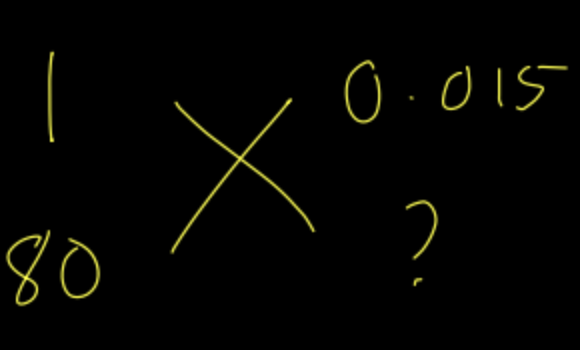

<br>

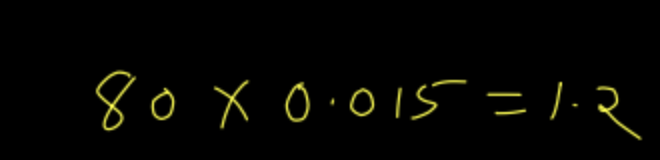

<br>

In [ ]:
rate = 80*0.015 # total rate

rate

1.2

**Conclusion**:

This implies that, on average, there are 1.2 students who forget their lunch in a given period.

<br>

> <font color='purple'>(b) What is the probability that exactly 3 of them will forget their lunch today?</font>

here, k = 3 and lambda = 1.2  

We can directly use **poisson.pmf()**


In [ ]:
poisson.pmf(k=3, mu=1.2)

0.08674393303071422

There is 8.67% chance that exactly 3 of them will forget their lunch today  

<br>  

> <font color='purple'>**Q. Can I model this question into binomial distribution?**</font>  

We have 80 students, we can define two probabilites here  

- probability of success $P(s)$ = student forgot the lunch = $0.015$
- probability of failure $P(f)$ = $1 = P(s) = 1 - 0.015$  


We want $P[X=3]$,  

- we can represent it as **out of 80 trials, I want 3 success**  

Using binomial formula, it will be  

- $^{80}C_3 (0.015)^3 (1-0.015)^{77}$

we just make this question of binomial

In [ ]:
binom.pmf(k=3, n=80, p=0.015) # Large n, small p, np=mu

0.08660120920447557

We got the similar answers using both **poisson and binomial.**

<br>  

<font color='purple'>In binomial</font>   
- We are counting the number of successes in $n$ trials where $P(s)$ = $p$  

<font color='purple'>In poisson</font>  

- Counting number of occurrences in a given time interval.  

<br>  

- Now, for 1 success we have probability p so for n success, the probability will be   
          1 success -> p
          n success -> ?  

          for n success -> np


Here, the $P(s)$ for 1 student is $0.015$. So $P(s)$ for 80 students will be $80 * 0.015 = 1.2$  

From this, we can obeserve that <font color='purple'>**$\Large λ = np$**</font>

This approximation is known as the <font color='purple'>**Poisson approximation to the binomial distribution**</font>  


### <font color='purple'>**Conditions for a reasonable approximation:**</font>


- The binomial distribution converges towards the Poisson distribution as the number of trials $(n)$ goes to infinity while the product $np$ converges to a finite limit.   

- Therefore, the Poisson distribution with parameter $λ = np$ can be used as an approximation to $B(n, p)$ of the binomial distribution **if n is sufficiently large and p is sufficiently small**

- For a reasonable approximation:  

  - This approximation is good if $n ≥ 20$ and $p ≤ 0.05$ such that $np ≤ 1$,   
  - or if $n > 50$ and $p < 0.1$ such that $np < 5$,   
  - or if $n ≥ 100$ and $np ≤ 10$.

The concept of "large enough" for the number of trials $(n)$ is not fixed   

However, a commonly used guideline is that
<font color='purple'>$n$ should be such that $np≤10$</font>



- If the above conditions met the we can use the Poisson distribution to estimate the probabilities of different event counts.

<br>

So, **in the context of our problem**, <font color='purple'>$n=80$ and $p=0.015$, the conditions $np\le10$ and $p≤0.1$ are satisfied.</font>

- We can use the Poisson distribution with $λ=80×0.015$ as an approximation to the binomial distribution.

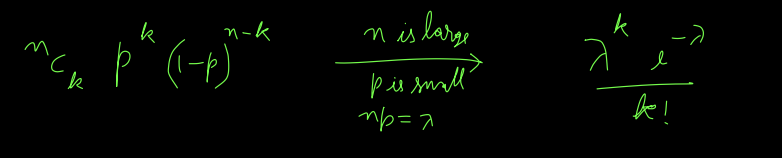

---

---